In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

In [3]:
data= pd.read_csv(Crop_recommendation.csv)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [65]:
data.loc[data['num_label']== 4, :]

,N,P,K,temperature,humidity,ph,rainfall,label,num_label,num_label_2
1900,133,47,24,24.402289,79.197320,7.231325,90.802236,cotton,4,
1901,136,36,20,23.095956,84.862757,6.925412,71.295811,cotton,4,
1902,104,47,18,23.965635,76.976967,7.633437,90.756167,cotton,4,
1903,133,47,23,24.887381,75.621372,6.827355,89.760504,cotton,4,
1904,126,38,23,25.362438,83.632761,6.176716,88.436189,cotton,4,
...,...,...,...,...,...,...,...,...,...,...
2095,87,44,43,23.874845,86.792613,6.718725,177.514731,jute,4,
2096,88,52,39,23.928879,88.071123,6.880205,154.660874,jute,4,
2097,90,39,37,24.814412,81.686889,6.861069,190.788639,jute,4,
2098,90,39,43,24.447439,82.286484,6.769346,190.968489,jute,4,


In [4]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

 ### subcategory 1: fruits ('banana':1.1, 'watermelon':1.2, 'muskmelon':1.3)
 ### subcategory 2: cereal crops ('rice':2.1, 'maize':2.2)
 ### subcategory 3: lentils ('chickpea':3.1, 'mungbean':3.1, 'blackgram':3.3)
 ### subcategory 4: textile crops ('cotton':4.1, 'jute':4.2)
 ### subcategory 5: 'coffee':0

In [5]:
data[['num_label', 'num_label_2']]= ''

In [6]:
data.loc[data['label'].isin(['banana', 'watermelon', 'muskmelon']), 'num_label'] = 1
data.loc[data['label'].isin(['rice', 'maize']), 'num_label'] = 2
data.loc[data['label'].isin(['chickpea', 'mungbean', 'blackgram']), 'num_label'] = 3
data.loc[data['label'].isin(['cotton', 'jute']), 'num_label'] = 4
data.loc[data['label'].isin(['coffee']), 'num_label'] = 0

In [7]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [8]:
pre_data = data.loc[data['num_label'].isin([0, 1, 2, 3, 4]), ['N', 'P', 'K', 'num_label']].apply(pd.to_numeric)

pre_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 2199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   N          1100 non-null   int64
 1   P          1100 non-null   int64
 2   K          1100 non-null   int64
 3   num_label  1100 non-null   int64
dtypes: int64(4)
memory usage: 43.0 KB


In [10]:
y= pre_data.pop('num_label')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(pre_data, y, test_size=0.25, random_state=5691)

In [13]:
acc = []
model = []

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

predicted_values = knn.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.8836363636363637
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       1.00      1.00      1.00        74
           2       0.67      0.72      0.69        46
           3       1.00      1.00      1.00        71
           4       0.76      0.76      0.76        58

    accuracy                           0.88       275
   macro avg       0.87      0.86      0.86       275
weighted avg       0.89      0.88      0.88       275



In [16]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(X_train,y_train)

predicted_values = DT.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  0.8618181818181818
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        26
           1       0.94      1.00      0.97        74
           2       0.58      0.96      0.72        46
           3       1.00      0.97      0.99        71
           4       0.97      0.53      0.69        58

    accuracy                           0.86       275
   macro avg       0.90      0.84      0.84       275
weighted avg       0.91      0.86      0.86       275



In [17]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.8981818181818182
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       1.00      1.00      1.00        74
           2       0.68      0.78      0.73        46
           3       1.00      1.00      1.00        71
           4       0.79      0.72      0.76        58

    accuracy                           0.90       275
   macro avg       0.89      0.89      0.89       275
weighted avg       0.90      0.90      0.90       275



In [18]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values);
acc.append(x)
model.append('XGBoost')
print("XGBoost Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

XGBoost Accuracy is:  0.9054545454545454
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       1.00      1.00      1.00        74
           2       0.71      0.76      0.74        46
           3       1.00      1.00      1.00        71
           4       0.80      0.76      0.78        58

    accuracy                           0.91       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.91      0.91      0.91       275



In [20]:
acc, model

([0.8836363636363637,
  0.8618181818181818,
  0.8618181818181818,
  0.8981818181818182,
  0.9054545454545454],
 ['K Nearest Neighbours', 'Decision Tree', 'Decision Tree', 'RF', 'XGBoost'])

## cross validate and hypertune KNN and Xgboost

## KNN

In [21]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [23]:
score = cross_val_score(knn,pre_data,y,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.87272727 0.87727273 0.91363636 0.81818182 0.84545455]


In [33]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.91636364, 0.88727273, 0.89454545, 0.87272727, 0.88363636,
       0.88363636, 0.86545455, 0.87636364, 0.88363636, 0.88363636,
       0.88727273, 0.88727273, 0.89454545, 0.89454545, 0.88727273,
       0.88727273, 0.89090909, 0.88727273, 0.90545455, 0.88363636])

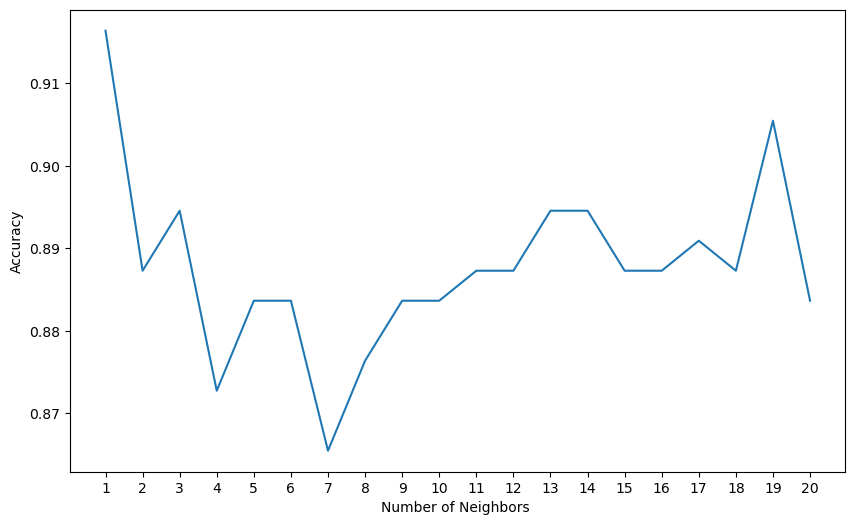

In [34]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

In [41]:
grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18,19,20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [42]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [43]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [44]:
g_res

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [12, 13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [45]:
g_res.best_score_

0.8824242424242424

In [46]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

In [53]:
knn_1 = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform',metric = 'manhattan')
knn_1.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=13)

In [54]:
# Training & Testing accuracy after applying hyper parameter
knn_train_accuracy = knn_1.score(X_train,y_train)
print("knn_train_accuracy = ",knn_1.score(X_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn_1.score(X_test,y_test)
print("knn_test_accuracy = ",knn_1.score(X_test,y_test))

knn_train_accuracy =  0.9175757575757576
knn_test_accuracy =  0.8872727272727273


## XGB

In [55]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values);
acc.append(x)
model.append('XGBoost')
print("XGBoost Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

XGBoost Accuracy is:  0.9054545454545454
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       1.00      1.00      1.00        74
           2       0.71      0.76      0.74        46
           3       1.00      1.00      1.00        71
           4       0.80      0.76      0.78        58

    accuracy                           0.91       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.91      0.91      0.91       275



In [66]:
XB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [56]:
score = cross_val_score(XB,pre_data,y,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.92272727 0.87727273 0.9        0.88636364 0.87272727]


In [57]:
XB_train_accuracy = XB.score(X_train,y_train)
print("Training accuracy = ",XB.score(X_train,y_train))
#Print Test Accuracy
XB_test_accuracy = XB.score(X_test,y_test)
print("Testing accuracy = ",XB.score(X_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.9054545454545454


In [59]:
import pickle

In [60]:
pickle.dump(XB,
            open(file='trained model/pre_pipe.sav',
                 mode='wb'))